In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv('input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Now that I have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions to check out the first and last lines of my DataFrame, respectively.

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# Get the overall concise summary of the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Lets check what are the numerical features in the df_train dataset

In [7]:
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

numeric features head

In [8]:
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Now a general description of SalePrice

In [9]:
# Now, as we will be predicting 'SalePrice' lets see description of that column
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

For a regression problem, the most important thing to do is to understand the distribution
of your target. If a target ranges between 1 and 10, and after training our model we get a
mean absolute error of 5, we can tell that the error is large in this context.
However, the same error for a target that ranges between 500,000 and 1,000,000 is
negligible.

- If you have numeric type dataset and want to visualize in histogram
- then the seaborn histogram will help you. For this seaborn distplot function responsible to plot it.
- On y-axis give the numeric dataset
- On x-axis gives bins. It means distribute given dataset in a particular range and show in bars
- e.g. bins= 18 and bins = 40

/home/paul/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


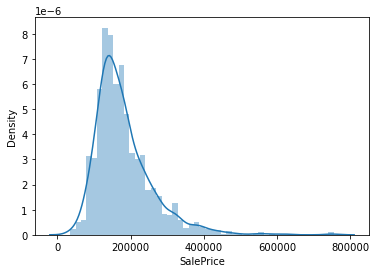

In [10]:
sns.distplot(df_train['SalePrice'])

From the above distplot, the 'SalePrice' is dense between 100k and 250k, but there are larger outliers on the right side, i.e the expensive price range.

Now, let’s have a look at the greater living area (square feet) against the sale price:

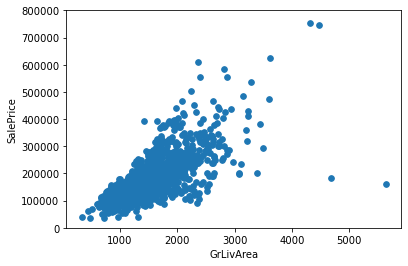

In [11]:
# first wo quickly view all the column names in the data
# print(df_train.columns)
# for above I could also use - data.columns
# Checking - 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), s=32)

 Its generally expected that larger living area comes with higher price. This chart shows thats generally true. But there are some 2–3 “cheap” houses with large living area
Now lets explore the “TotalBsmtSF” column — Total square feet of the basement area.

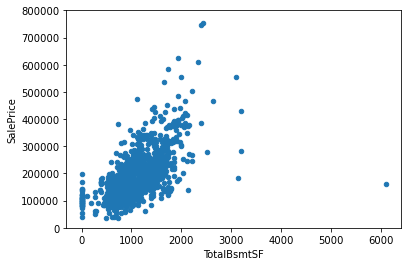

In [12]:
# Checking - 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

We can see that basement area indeed may have good predictive power for the model.

Now lets check “OverallQual” — overall material and finish quality. This one may be more subjective feature.

### Now list of variables that contain year information, because I will compare the difference between All years feature with SalePrice

In [13]:
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

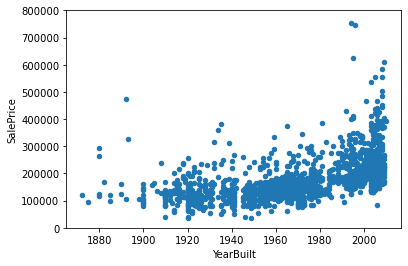

In [14]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
data.plot.scatter(x = 'YearBuilt', y = 'SalePrice', ylim=(0, 800000))

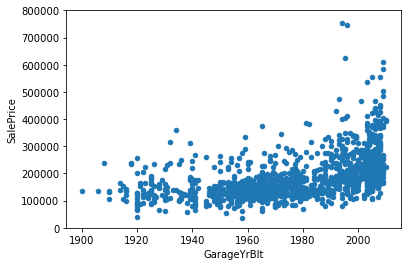

In [15]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['GarageYrBlt']], axis=1)
data.plot.scatter(x = 'GarageYrBlt', y = 'SalePrice', ylim=(0, 800000))

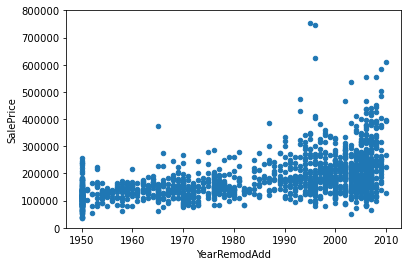

In [16]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['YearRemodAdd']], axis=1)
data.plot.scatter(x = 'YearRemodAdd', y = 'SalePrice', ylim=(0, 800000))

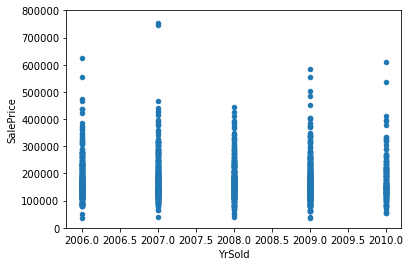

In [17]:
# Checking - 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train['YrSold']], axis=1)
data.plot.scatter(x = 'YrSold', y = 'SalePrice', ylim=(0, 800000))


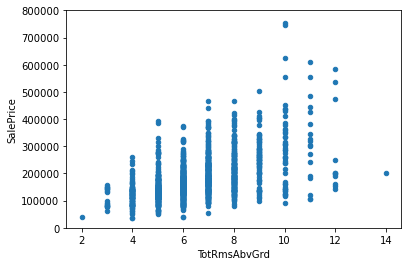

In [18]:
# Checking - TotRmsAbvGrd' i.e. total rooms above grade
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
data.plot.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', ylim=(0, 800000))


(-0.5, 9.5, 0.0, 800000.0)

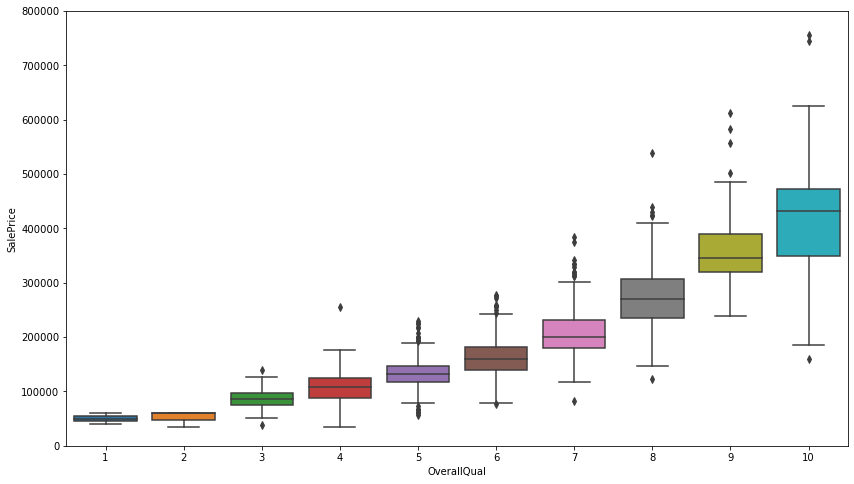

In [19]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin= 0, ymax=800000)

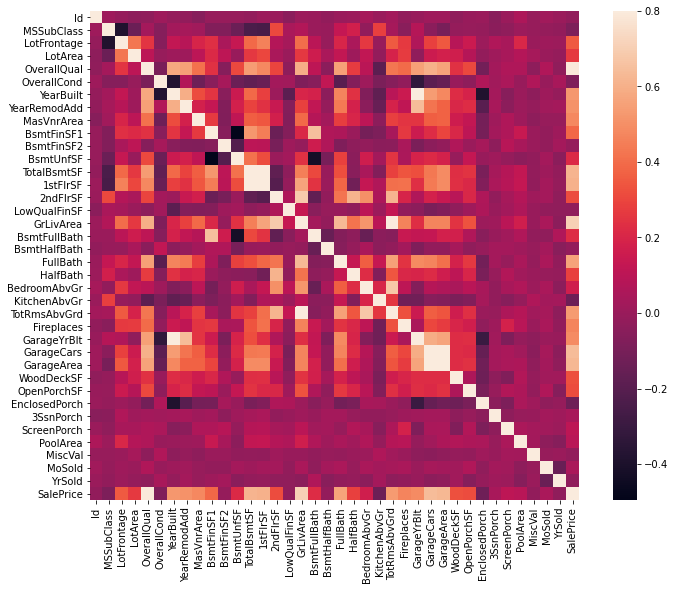

In [20]:

# Now lets view the top 8 correlated features with the sale price:
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=0.8, square=True)

Now a simple Feature Engineering - of finding out the top-most correlated columns with SalesPrice. 
Later while in our Model will use only these top-most important features to predict SalePrices.

Feature Engineering - Find out the most correlated columns with SalesPrice and use only those columns in modelNow the big beautiful scatter plot with a hell of lot of visual data in a single plot

In [21]:
top_correlations = df_train.corr()
top_feature_columns = top_correlations['SalePrice'][top_correlations['SalePrice'].values > 0.5].index.values
top_feature_columns

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'SalePrice'], dtype=object)

And now another heatmap with ONLY the top 10 correlated features
And within the top 10 features I can see 'GarageYrBlt' included but, that column has many empty fields. Hence I would like to fill them with zeros.

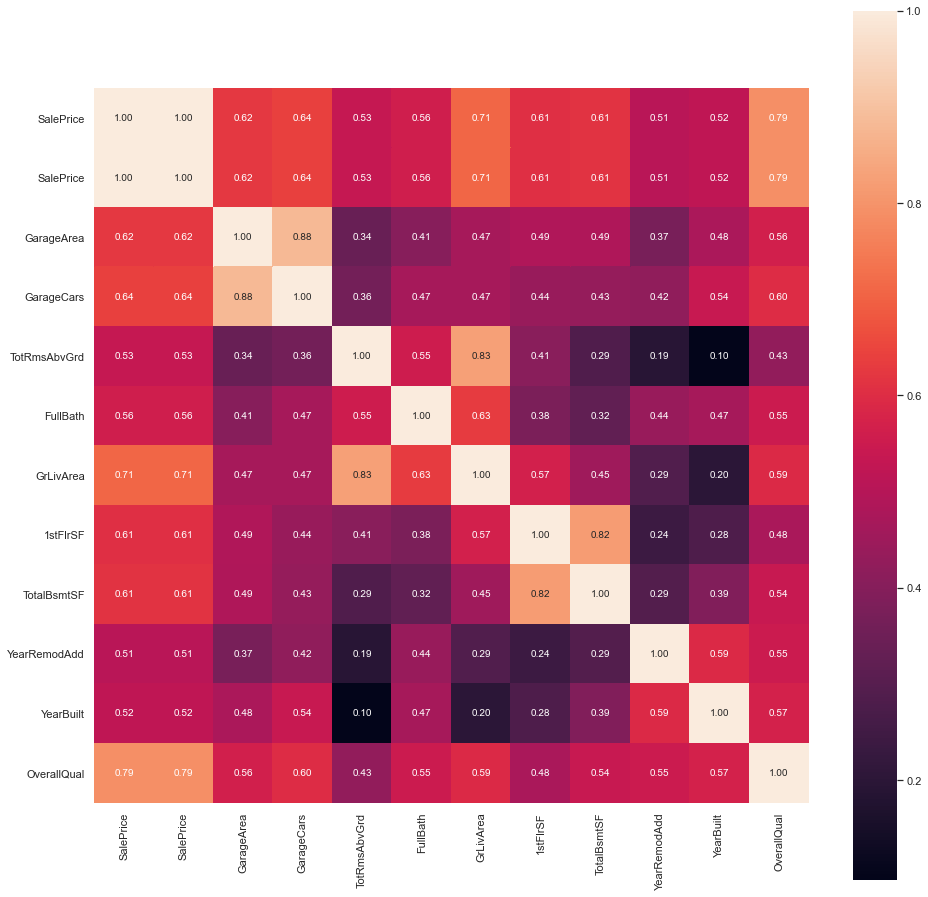

In [22]:
# Handling Missing Values for 19 features which have missing values mentioned above
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
# filling in missing GarageYrBuilt values with zeros.  
# But this may not be the most logical approach - refer to this discussion below for mor perspective
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60143

heat_map_with_top_correlated_features = np.append(top_feature_columns[-12:], np.array(['SalePrice']))
pearson_correlation_coefficients = np.corrcoef(df_train[heat_map_with_top_correlated_features[::-1]].T)
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
with sns.axes_style('white'):
    sns.heatmap(pearson_correlation_coefficients, yticklabels=heat_map_with_top_correlated_features[::-1], xticklabels=heat_map_with_top_correlated_features[::-1], fmt='.2f', annot_kws={'size': 10}, annot=True, square=True, cmap=None)
    
    

Now lets glance over the above heatmap to understand some points just visualy looking at the correlation number

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' have strong correlation with 'SalePrice'.

- While 'GarageCars' and 'GarageArea' also have strong correlation, but they are mostly mutually dependent i.e. they are NOT linearly independent of each other, i.e. there is a high-multicollinearity (0.88 as we can see in the figure) between them. Because, the number of cars that fit into the garage is dependent of the garage area. Hence, we just need one of these variables in our analysis (we can decide to keep 'GarageCars' as its correlation with 'SalePrice' is higher).
- Same mutual dependence applies to the two features 'TotalBsmtSF' and '1stFloor'  AND ALSO 'TotRmsAbvGrd' and 'GrLivArea',

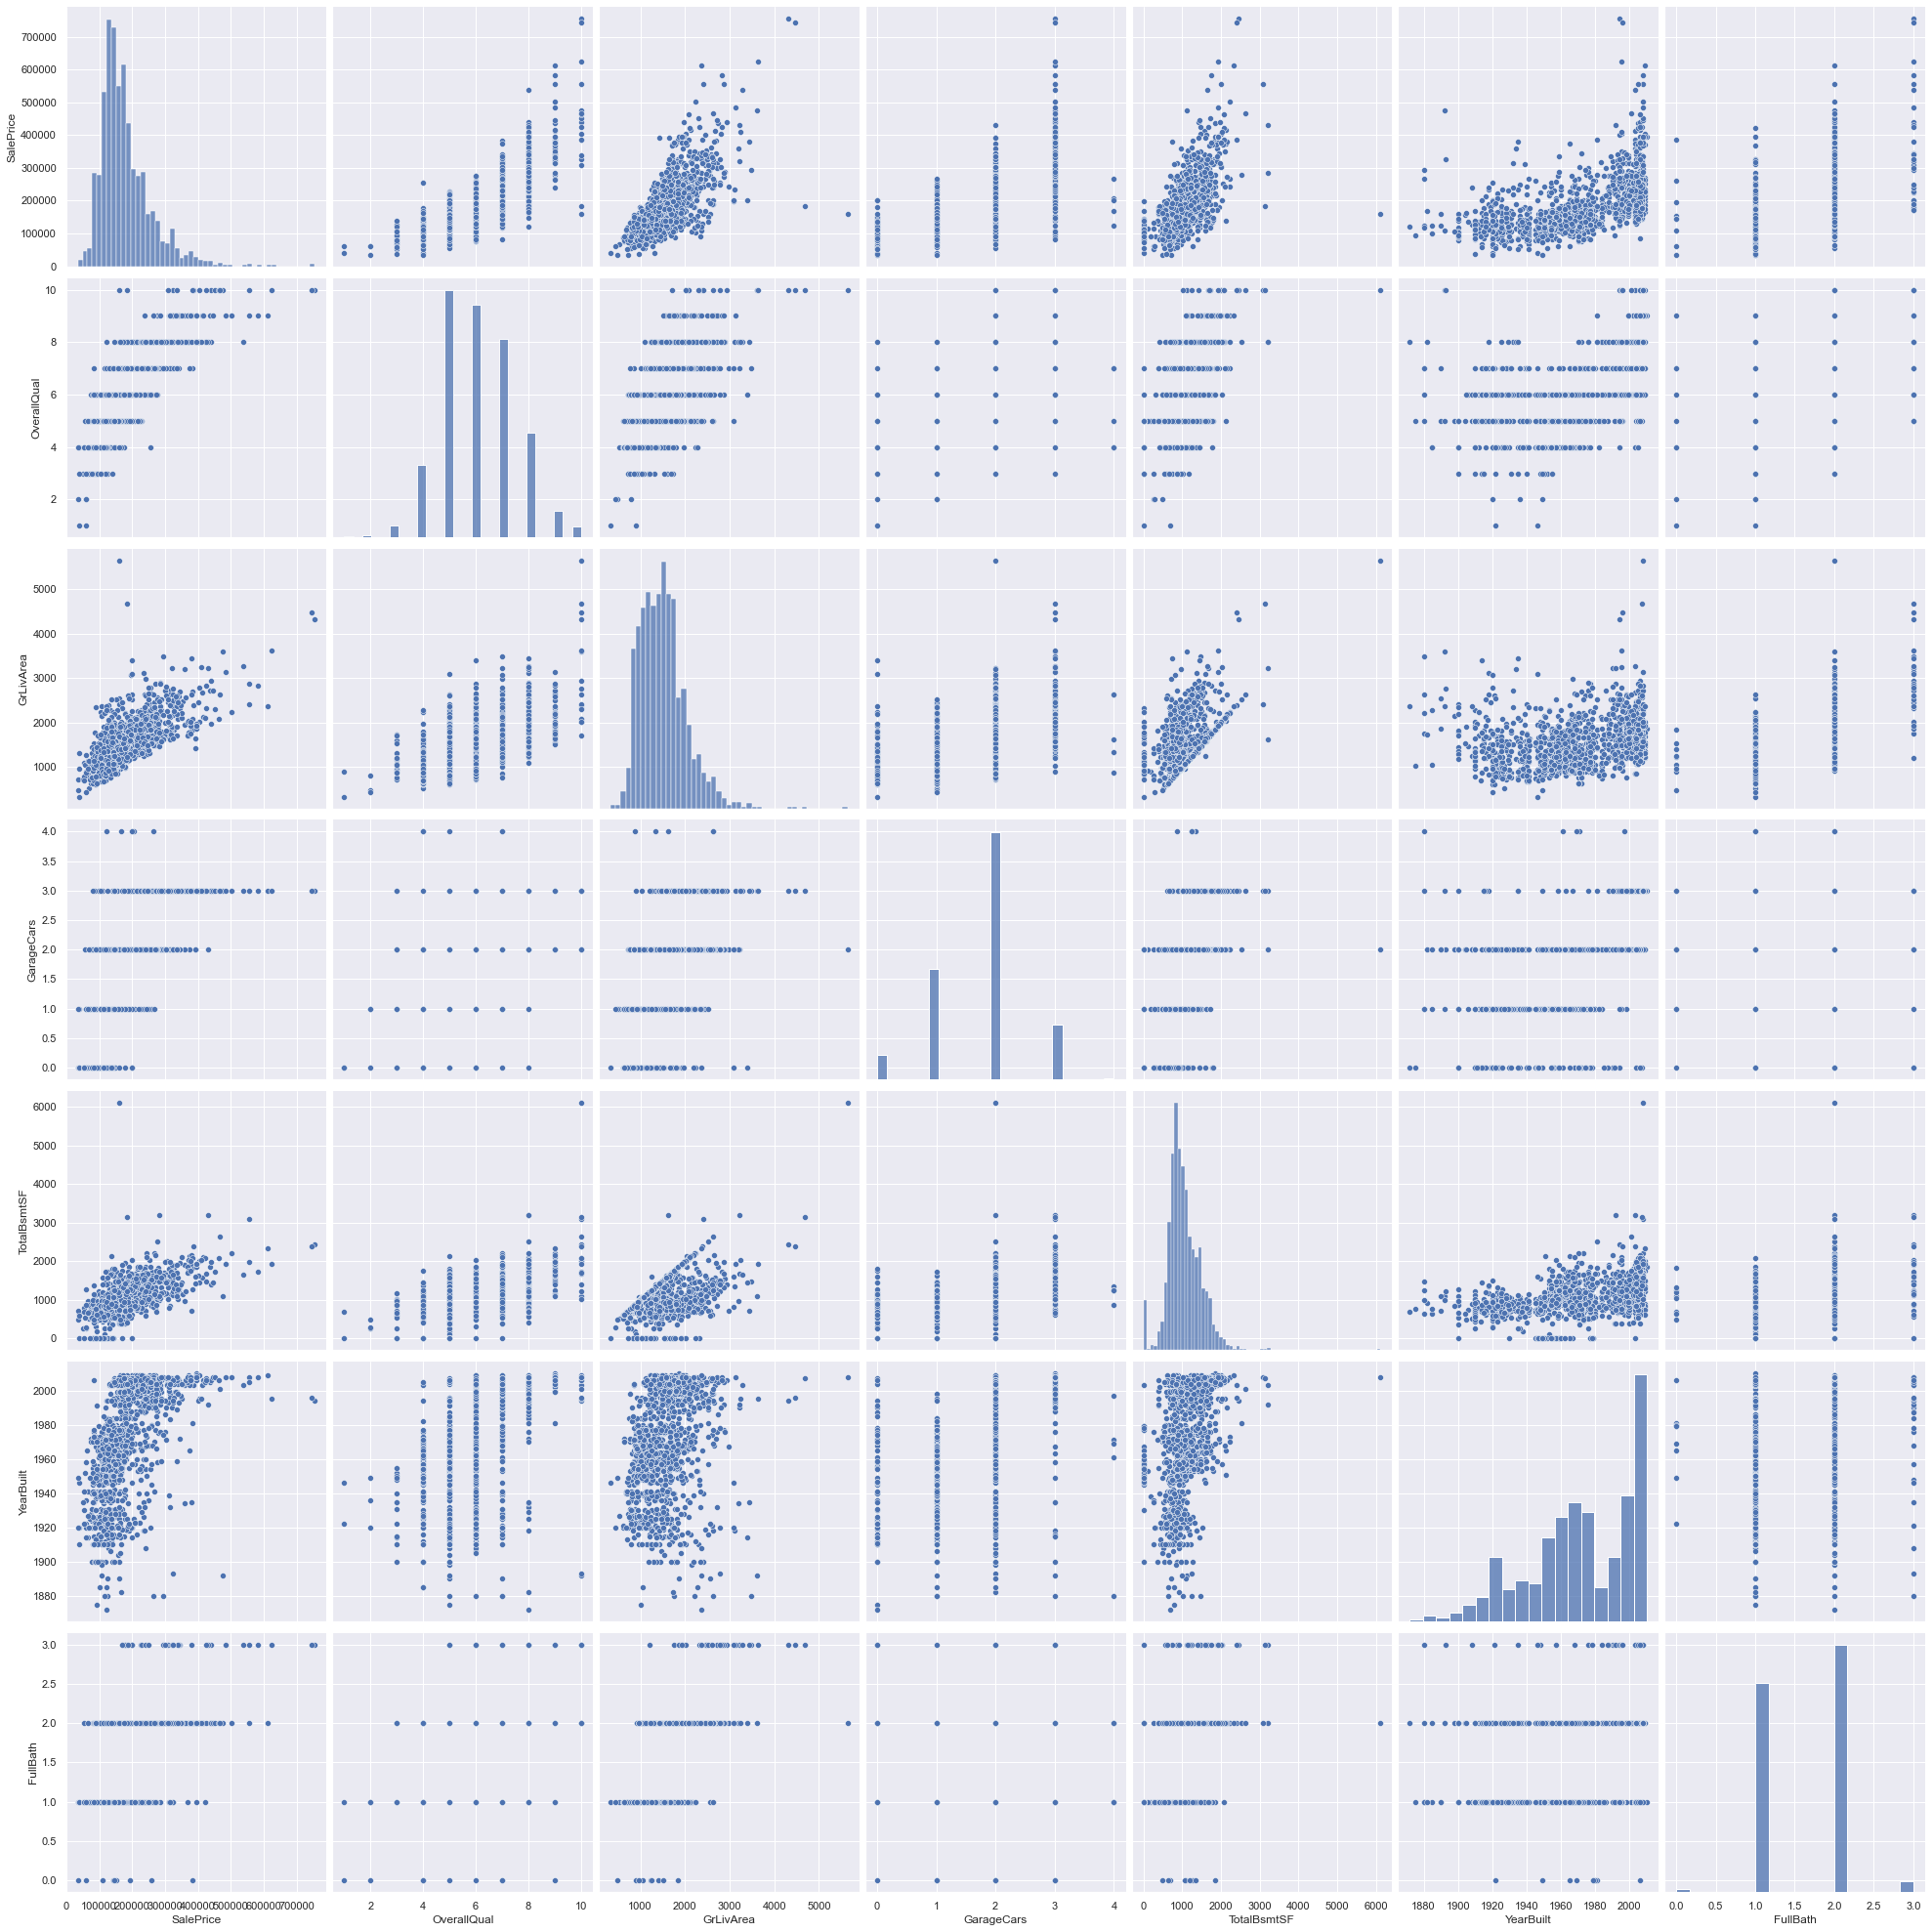

In [23]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
sns.pairplot(df_train[cols], height=4)
plt.show()

Checking out missing data

In [24]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## Now the all important SalePrice prediction, Using Linear Regression

## Loss function

Given our Simple Linear Regression equation:

$$Y = bX + a$$

We can use the following cost function to find the coefficients:

### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - h_w(x^{(i)}))^2$$

where

$$h_w(x) = g(w^Tx)$$

### and Root Mean Squared Error

$$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y^{(i)} - h_w(x^{(i))}))^{2}}$$

Mean Squared Error (MSE) is the workhorse of basic loss functions. For calculating MSE, I take the difference between my y value predictions and the ground truth, square it, and average it out across the whole dataset.

---

As per the book Hands-On Machine Learning with Scikit-Learn & TensorFlow the formula for the Batch Gradient Descent method is:

$ \dfrac{\partial}{\partial \theta_{j}} MSE(\theta)= \dfrac{2}{m}\sum_{i=1}^{m}(\theta^T \cdot \boldsymbol{x}^{(i)}-y^{(i)})\cdot x^{(i)}$

So that the gradient vector of the cost function is:

$\bigtriangledown_{\theta}MSE(\theta) = \begin{bmatrix} \dfrac{\partial}{\partial \theta_{0}} MSE(\theta_0) \\ \dfrac{\partial}{\partial \theta_{1}} MSE(\theta_1) \\ \dfrac{\partial}{\partial \theta_{2}} MSE(\theta_2) \\ \vdots \\ \dfrac{\partial}{\partial \theta_{n}} MSE(\theta_n) \end{bmatrix} = \dfrac{2}{m} \cdot X^T \cdot (X \cdot \theta - y)$

---

For Proof of Batch Gradient Descent's cost function gradient vector

The cost function is given by

$$J = \dfrac{1}{N}\sum_{n=1}^{N}\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]^2.$$

Take the total derivative

$$dJ = \dfrac{1}{N}\sum_{n=1}^N\{2\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]d\boldsymbol{w}^T\boldsymbol{x}_n \}.$$

As $d\boldsymbol{w}^T$ is not dependent on the summation index $n$ we can pull it out of the sum. We can put it in front of $ \left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]$ because it is a scalar. Hence we obtain

$$dJ = d\boldsymbol{w}^T\left[\dfrac{1}{N}\sum_{n=1}^N\{2\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]\boldsymbol{x}_n \}\right].$$

Now, we know that the term in the bracket is the gradient of $J$ with respect to $\boldsymbol{w}$. Hence,

$$\text{grad}_{\boldsymbol{w}}J=\dfrac{1}{N}\sum_{n=1}^N\{2\left[\boldsymbol{w}^T\boldsymbol{x}_n-y_n \right]\boldsymbol{x}_n \}.$$


---
The explanation for gradient and total derivative relationship.

Let $J(\boldsymbol{w})=J(w_0,w_1,...,w_m)$ be a multivariate function. The total derivative of $J$ is given by

$$dJ = \dfrac{\partial J}{\partial w_0}dw_0+\dfrac{\partial J}{\partial w_1}dw_1+\ldots+\dfrac{\partial J}{\partial w_m}dw_m$$
$$=[dw_0, dw_1,\ldots, dw_m][\dfrac{\partial J}{\partial w_0},\dfrac{\partial J}{\partial w_1},\ldots,\dfrac{\partial J}{\partial w_m}]^T$$
$$=d\boldsymbol{w}^T\text{grad}_{\boldsymbol{w}}J.$$


In [25]:
def loss_func(y_predicted, y_actual):
    squared_error = (y_predicted - y_actual) ** 2
    sum_squared_error = squared_error.sum()
    size = len(y_actual)
    return 1/(2*size) * sum_squared_error

In [26]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x.shape

(1460, 2)

##### Now lets define our Hypothesis variable, meaning the one to be predicted, and here we are predicting 'Sale Price'. And also the independent variable. Lets say first I want to make the independent variable as 'GrLivArea' which represents, "Above grade (ground) living area square feet"

In [27]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

 I will preprocess the data using the following formula for standardization

$x′=(x−μ) / σ$

The above formulae is called Z-score is one of the most popular methods to standardize data. It is equal to the original variable, minus its mean, divided by its standard deviation.
Once the standardization is done, all the features will have a mean of zero, a standard deviation of one, and thus, the same scale.
This process produces standard scores that represent the number of standard deviations above or below the mean that a specific observation falls. For instance, a standardized value of 2 indicates that the observation falls 2 standard deviations above the mean. This interpretation is true regardless of the type of variable that you standardize.

In [28]:
x = (x - x.mean()) / x.std()
print(x.shape)
# (1460, ) i.e. it will be an array like
# [0 1 2 3 4 5 6 7 8.... 1459]

x = np.c_[np.ones(x.shape[0]), x]
print(x.shape)
# (1460, 2)

(1460,)
(1460, 2)


In [29]:
# Now below I am defining a basic Linear regression function

class SimpleLinearRegression:

    def get_predictions(self, X):
        return np.dot(X, self._W)

    def _get_gradient_descent_step(self, X, targets, learning_rate):
        predictions = self.get_predictions(X)

        error = predictions - targets
        gradient = np.dot(X.T, error)/len(x)

        # now update the W
        self._W -= learning_rate * gradient


    def fit(self, X, y, iterations_num=1000, learning_rate=0.01):
            self._W = np.zeros(X.shape[1])

            self._history_of_cost = []
            self._w_history = [self._W]

            for i in range(iterations_num):
                predictions = self.get_predictions(X)
                cost = loss_func(predictions, y)

                self._history_of_cost.append(cost)

                self._get_gradient_descent_step(x, y, learning_rate)

                self._w_history.append(self._W.copy())

            return self


In [30]:
house_price_linear_result = SimpleLinearRegression()
house_price_linear_result.fit(x, y, iterations_num=2000, learning_rate=0.01)
print(house_price_linear_result._W)

[180921.19555322  56294.90199925]


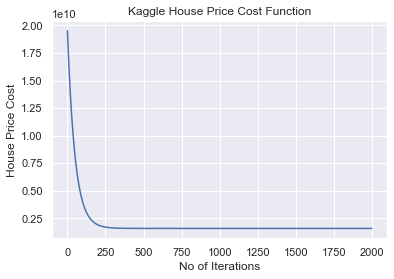

In [31]:
# Now plot the Cost function
plt.title('Kaggle House Price Cost Function')
plt.xlabel('No of Iterations')
plt.ylabel('House Price Cost')
plt.plot(house_price_linear_result._history_of_cost)
plt.show()


Now do the same implementation with a case for Multivariate Linear Regresstion.

From our earlier heat-map of Pearson Correlation we already know the top features that are correlated with 'SalePrice' which are

`['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']`

But first lets implement with 3 variables from the above list of 7

In [32]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

# just like before let's standardize our independent variable data
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

house_price_multi_variate_linear_result = SimpleLinearRegression()
house_price_multi_variate_linear_result.fit(x, y, iterations_num = 2000, learning_rate=0.01)

print(house_price_multi_variate_linear_result._W)

[180921.19555322  37478.604254    26631.93830568  15921.22581327]


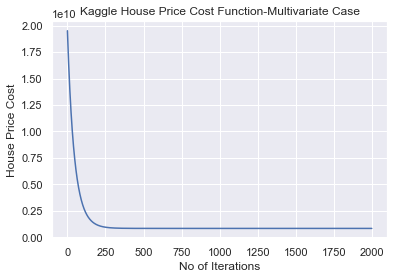

In [33]:
plt.title('Kaggle House Price Cost Function-Multivariate Case')
plt.xlabel('No of Iterations')
plt.ylabel('House Price Cost')
plt.plot(house_price_multi_variate_linear_result._history_of_cost)
plt.show()

Looks like our cost function is performing slightly better with Multivariate case so. Now include all the below 7 variables

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']`

In [ ]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']]

# just like before let's standardize our independent variable data
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

house_price_multi_variate_linear_result = SimpleLinearRegression()
house_price_multi_variate_linear_result.fit(x, y, iterations_num = 2000, learning_rate=0.01)

print(house_price_multi_variate_linear_result._W)

plt.title('Kaggle House Price Cost Function-Multivariate Case')
plt.xlabel('No of Iterations')
plt.ylabel('House Price Cost')
plt.plot(house_price_multi_variate_linear_result._history_of_cost)
plt.show()

Okay so that was our attempt at Multivariate Linear Regression and now we will implement the same with the Linear Regression function from `sklearn.linear_model`

